In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import csv
import numpy as np
import random

In [41]:
base_path = "../configuration/p_date=2022-06-24-10_43_42" 

with open(f'{base_path}/csv_configuration.csv', 'r') as file:
    reader = csv.reader(file, delimiter=";")
    csv_data = {v[0]: v[1:] for v in reader}
    print("Length: " + str(len(csv_data)))

Length: 17


In [42]:
def plot(plt, _id, data, title, labelX, labelY):
    colors = [plt.cm.hsv(i) for i in np.linspace(0, 1, 600)]
    random.shuffle(colors)
    
    interval = 500
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    # plt.scatter(data.keys(), data.values())
    plt.plot(moving_average.keys(), moving_average.values(), color=colors[_id], label=f"Id: {_id}")

In [43]:
def _print_data(plt, base_path, _id, _min, _max):
    with open(f'{base_path}/log_{_id}.json', 'r') as f:
        data = json.load(f)
    
    l = len(data["loss"])
    #print(f"{l} records")
    
    # Loss
    loss = [ v for v in data["loss"] if str(v) != "nan" ][_min:_max]
    mean_loss = stat.mean(loss)
    loss_filtered = { k: v for k, v in enumerate(loss) } #if v <= mean_loss }

    # Mae
    mae = [ v for v in data["mae"] if str(v) != "nan" ]
    mean_mae = stat.mean(mae)
    mae_filtered = { k: v for k, v in enumerate(mae) } #if v <= mean_mae }

    # Mean Q
    mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]
    mean_mean_q = stat.mean(mean_q)
    mean_q_filtered = { k: v for k, v in enumerate(mean_q) }#if v <= mean_mean_q }

    # Reward
    episode_reward = { k: v for k, v in enumerate(data["episode_reward"]) if str(v) != "nan" }

    # Duration
    duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

    # NB Episode steps
    nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }
    
    plot(plt, _id, loss_filtered, "Loss over time", "episodes", "loss")
    # plot(mae_filtered, "Mae over time", "episodes", "mae")
    # plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")
    
    # plot(episode_reward, "Episode reward over time", "episodes", "reward")
    # plot(duration, "Duration over time", "episodes", "duration")
    # plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

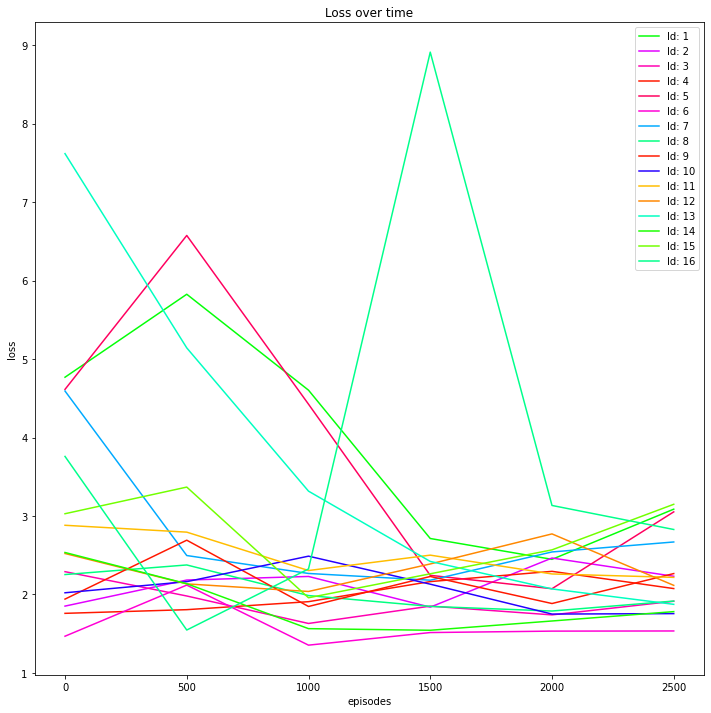

In [47]:
plt.figure(figsize=(12,12))

for i in range(1, len(csv_data)):  
    #print(csv_data[str(i)])
    _print_data(plt, base_path, i, 2_000, 5_000)


plt.title("Loss over time")
plt.xlabel("episodes")
plt.ylabel("loss")
plt.legend()
plt.show()

In [45]:
csv_data["id"]

['duration',
 'nb_steps',
 'mean_train',
 'max_train',
 'min_train',
 'mean_test_agent',
 'max_test_agent',
 'min_test_agent',
 'mean_test_own',
 'max_test_own',
 'min_test_own',
 'break_counter',
 'n',
 'windows_length',
 'adam_learning_rate',
 'adam_epsilon',
 'batch_size',
 'target_model_update',
 'dueling_option',
 'activation',
 'layers',
 'unit_1',
 'unit_2',
 'unit_3']

In [46]:
csv_data["6"]

['783.248227',
 '50000',
 '-47.20412813575996',
 '-35.25',
 '-84.42',
 '-43.024300000000004',
 '-38.730000000000004',
 '-49.0',
 '16.327939590075513',
 '48',
 '0',
 '100',
 '100',
 '1',
 '0.005',
 '1e-05',
 '32',
 '400',
 'avg',
 'linear',
 '3',
 '96',
 '80',
 '64']

In [48]:
csv_data["10"]

['712.265226',
 '50000',
 '-46.602592811714246',
 '-34.58',
 '-77.5',
 '-43.175700000000006',
 '-36.34',
 '-49.0',
 '14.362637362637363',
 '46',
 '0',
 '100',
 '100',
 '1',
 '0.0005',
 '1e-05',
 '32',
 '300',
 'avg',
 'linear',
 '3',
 '96',
 '80',
 '64']